### ex00 라이브러리 복습

- numpy : 고속연산의 수학함수, 고차원 배열(ndarray), 같은 인덱스의 데이터끼리는 한 번에 연산이 가능
- pandas :  표 형태의 데이터를 다룰때 사용(엑셀 대체), 간단한 시각화 기능
- matplotlib : python의 시각화 도구, seaborn(matplotlib 기반의 사용자 편의성을 확보한 시각화 도구)

In [11]:
import pandas as pd
# 데이터프레임 컬럼의 최대 넓이 해제
pd.set_option("display.max_colwidth",None)

In [4]:
# 시리즈 1개 생성
s1 = pd.Series([1,10,30,50], index=['a','b','c','d'])
# 데이터 프레임 1개 생성
df1 = pd.DataFrame([[1,2],[3,4],[5,6]], index=['a','b','c'], columns=['name','age'])

In [5]:
df1

,name,age
a,1,2
b,3,4
c,5,6


In [12]:
#데이터 읽기 (apt.csv을 읽어서 상위 5개 데이터만 살펴보기)
df2= pd.read_csv("./data/apt.csv", encoding="cp949")
df2.head() #상위 데이터 보여주기(기본5개)
# 상위 20개를 보고 싶다면 df2.head(20)


,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [16]:
# 색인
# iloc, loc => 특정 인덱스를 지정해서 색인
# iloc :숫자, loc : 글자
# 아파트 이름, 면적, 층 컬럼 색인
# 1~100번째 행 색인

# df2.iloc[행,열]
df3=df2.iloc[0:100,[4,5,9]]
df3

# df2.loc[행,열]
df3=df2.loc[0:100,['아파트','면적','층']]

In [17]:
# 불리언 색인(조건기반 색인)
# df3에서 면적이 50 미만인 아파트만 색인

# df4=df3[조건식]
df4=df3[df3['면적']<50]
df4

,아파트,면적,층
35,서일2,27.750,1
43,내곡시영,39.300,5
45,노암2주공,42.740,1
46,노암3한라,39.762,11
49,노암3한라,39.762,3
59,영진노암2차,49.525,2
67,삼우그린,30.240,4
68,삼우그린,43.200,9
69,삼우그린,43.200,12
83,삼동광업소사원,43.470,2


In [25]:
# 광주광역시의 평균 아파트 가격 구하기
# 1. apply 함수(pandas에서 행 또는 열 단위로 사용자 정의 함수를 적용하고 싶을 때 사용)

In [31]:
# 지역명을 추출하는 사용자 정의 함수
def extractName(row):
    return row.split(" ")[0]

In [35]:
#df2['지역'].apply(사용자 정의 함수)
df2['시도명']=df2['지역'].apply(extractName)
df2[df2['시도명']=='광주광역시']['가격'].mean()

21786.90428211587

In [38]:
# 시리즈에서 제공하는 Str 함수 이용
df2[df2['지역'].str.contains('광주광역시')]['가격'].mean()

21786.90428211587

In [45]:
# matplotlib에 한글 폰트 적용시키기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='시도명'>

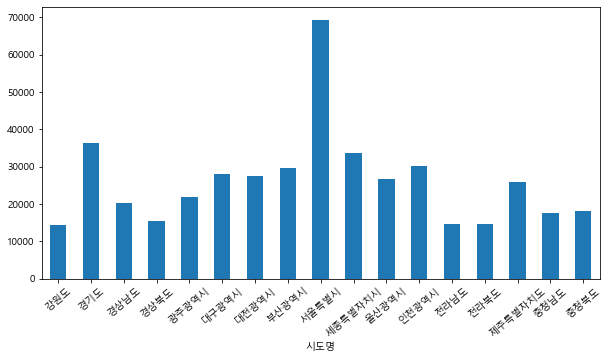

In [46]:
# 각 시도별 아파트 가격 평균을 구해보자.
df5=df2.groupby(by=['시도명'])['가격'].mean().plot(kind="bar", rot=40, figsize=(10,5))
df5


In [62]:
# 면적당 평균가격이 높은 동 상위 10개 추출
df2['면적당가격']=(df2['가격']/df2['면적'].astype('int32')).astype('int32')  # astype('int32'): 정수 타입인데 크기가 32bit로 변환


In [65]:
 # 동이름 추출
df2['동이름']=df2['지역'].str.split(" ").str[2]

In [69]:
df2.groupby(by=['동이름'])['면적당가격'].mean().sort_values(ascending=False).head(10)

동이름
개포동     3234.666667
압구정동    2602.700000
반포동     2546.352941
교북동     2177.000000
잠원동     2155.266667
대치동     2111.590909
수서동     1993.800000
역삼동     1949.909091
잠실동     1914.545455
홍파동     1906.000000
Name: 면적당가격, dtype: float64